## Amey Ashok Sawant 
## 700740611

##### Github Link : https://github.com/amey-13/CS_5170_Machine_Learning
##### Recording Link : https://drive.google.com/drive/u/1/folders/1_coA-xY3dmOk_MEI4UFib6kKpcwRV-WL

### 1. Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Filling out the null values in the dataset that will prevent PCA by using imputer function

X = df.iloc[:,1:]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
X=pd.DataFrame(X)

In [4]:
# Appplying PCA on the dataset

pca = PCA(2)
x_pca = pca.fit_transform(X)
df_2 = pd.DataFrame(data=x_pca)
final_df = pd.concat([df_2, X.iloc[:,-1]], axis=1)
final_df.head()

,0,1,16
0,-4326.383956,921.566884,12.0
1,4118.916676,-2432.846347,12.0
2,1497.907660,-1997.578692,12.0
3,1394.548556,-1488.743450,12.0
4,-3743.351874,757.342659,12.0


In [6]:
# Applying k-means algorithm on the PCA result with n_clusters=4

km = KMeans(n_clusters=4)
km.fit(final_df)

KMeans(n_clusters=4)

In [9]:
# Getting the Silhoutte score before scaling

y_cluster_kmeans = km.predict(final_df)
score = metrics.silhouette_score(final_df, y_cluster_kmeans)
print('Silhoutte score for PCA:',score)

Silhoutte score for PCA: 0.5071212007776188


In [10]:
# Scaling the dataset

scaler = StandardScaler()
scaler.fit(X)
x_scaler = scaler.transform(X)

In [11]:
# Applying PCA with k=2 again

pca = PCA(2)
x_pca = pca.fit_transform(x_scaler)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2,df[['TENURE']]],axis=1)
print(finaldf)

             0         1  TENURE
0    -1.682220 -1.076446      12
1    -1.138287  2.506505      12
2     0.969678 -0.383546      12
3    -0.873630  0.043159      12
4    -1.599433 -0.688573      12
...        ...       ...     ...
8945 -0.359631 -2.016148       6
8946 -0.564376 -1.639142       6
8947 -0.926206 -1.810789       6
8948 -2.336551 -0.657959       6
8949 -0.556422 -0.400472       6

[8950 rows x 3 columns]


In [12]:
# Applying k-means on the scaled PCA output with n_clusters=4

km = KMeans(n_clusters=4)
km.fit(finaldf)

KMeans(n_clusters=4)

In [13]:
# Computing the Silhoutte score for 

y_cluster_kmeans = km.predict(finaldf)
score = metrics.silhouette_score(finaldf, y_cluster_kmeans)
print('Silhoutte score for Scaling+PCA+K-Means:',score)

Silhoutte score for Scaling+PCA+K-Means: 0.4378878623153349


#### After comparing both the Silhoutte scores we can infer that the Silhoutte score has reduced for the Scaled PCA

### 2. Use pd_speech_features.csv

In [14]:
speech_features_df=pd.read_csv('pd_speech_features.csv')
speech_features_df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [15]:
# Scaling the dataset

x =speech_features_df.iloc[:,1:]
scaler = StandardScaler()
scaler.fit(x)
speech_x_scaler = scaler.transform(x)

In [16]:
# Applying PCA=3

pca = PCA(3)
speech_x_pca = pca.fit_transform(speech_x_scaler)
speech_features_df_2 = pd.DataFrame(data=speech_x_pca)
speech_features_final_df = pd.concat([speech_features_df_2,speech_features_df[['class']]],axis=1)
print(speech_features_final_df)

             0         1          2  class
0   -10.052430  1.476819  -6.828358      1
1   -10.641066  1.590407  -6.811682      1
2   -13.520081 -1.243923  -6.794534      1
3    -9.142526  8.848870  15.300286      1
4    -6.758091  4.624221  15.645675      1
..         ...       ...        ...    ...
751  22.377449  6.470192   1.439470      0
752  13.503270  1.450492   9.344877      0
753   8.328507  2.392513  -0.911236      0
754   4.074595  5.417627  -0.847061      0
755   4.052809  6.076465  -2.022274      0

[756 rows x 4 columns]


In [19]:
# Applying SVM and reporting the performance

clf = SVC(kernel='linear') 
x =speech_features_final_df.iloc[:,:-1]
y =speech_features_final_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)
print("SVM accuracy =", accuracy_score(y_test, y_pred))

SVM accuracy = 0.7960526315789473


In [20]:
# Getting the classification report for the SVM classifier

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.37      0.47        38
           1       0.82      0.94      0.87       114

    accuracy                           0.80       152
   macro avg       0.74      0.65      0.67       152
weighted avg       0.78      0.80      0.77       152



### 3. Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data to k=2.

In [22]:
iris_df = pd.read_csv("iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
# Applying the Standardscaler()

scale = StandardScaler()
X_train_std = scale.fit_transform(iris_df.iloc[:,:-1].values)

# Label encoding the species column 

encoding = LabelEncoder()
y = encoding.fit_transform(iris_df['Species'].values)

# Applying LDA on the Data

lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train_std,y)

data=pd.DataFrame(X_train)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,10.036763,-0.451330,0
1,9.172930,-1.477234,0
2,9.480989,-0.979693,0
3,8.818119,-1.408602,0
4,9.960200,-0.112546,0


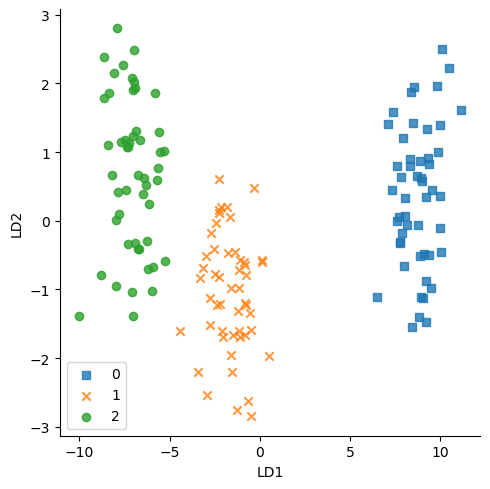

In [24]:
# Plotting the Scatter plot

markers = ['s', 'x', 'o']
colors = ['y', 'b', 'g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend()
plt.show()

### 4. Briefly identify the difference between PCA and LDA

Both PCA and LDA are linear transformation techniques. However, PCA is an unsupervised while LDA is a supervised dimensionality reduction technique.

### Principal Component Analysis

PCA summarizes the feature set without relying on the output. PCA tries to find the directions of the maximum variance in the dataset. In a large feature set, there are many features that are merely duplicate of the other features or have a high correlation with the other features. Such features are basically redundant and can be ignored. The role of PCA is to find such highly correlated or duplicate features and to come up with a new feature set where there is minimum correlation between the features or in other words feature set with maximum variance between the features. Since the variance between the features doesn't depend upon the output, therefore PCA doesn't take the output labels into account.

### Linear Discriminant Analysis

LDA tries to reduce dimensions of the feature set while retaining the information that discriminates output classes. LDA tries to find a decision boundary around each cluster of a class. It then projects the data points to new dimensions in a way that the clusters are as separate from each other as possible and the individual elements within a cluster are as close to the centroid of the cluster as possible. The new dimensions are ranked on the basis of their ability to maximize the distance between the clusters and minimize the distance between the data points within a cluster and their centroids. These new dimensions form the linear discriminants of the feature set.